In [52]:
import numpy as np
import cantera as ct

In [53]:
# import the model for gas-Fe interface and adjacent gas phase
cat = ct.Interface('FeSiO2_NOMC.yaml','Fe_surf')
gas = surf.adjacent['gas']

In [54]:
# Set the initial conditions
T0 = 900 # K
p0 = ct.one_atm # atm
gas.TPX = T0, p0, "CH4: 0.9, N2: 0.1"
cat.TP = T0, p0
D = 0.004 # diameter of the tube [m]
Ac = np.pi * D**2 / 4 # corss section of the tube [m2]
w_cat = 0.82 # weight of catalyst [gcat]
GHSV = 1 # m3/gcat/hr
u0 = GHSV * w_cat /3600 / Ac # [m/s]

In [55]:
# Set the Reactor conditions
reactor = ct.FlowReactor(gas)
reactor.area = Ac
reactor.mass_flow_rate = gas.density * u0 * Ac
reactor.energy_enabled = False

rsurf = ct.ReactorSurface(cat, reactor)
net = ct.ReactorNet([reactor])
soln = ct.SolutionArray(gas, extra=['x','CH4_dep'])
kch4 = cat.kinetics_species_index('CH4')

In [56]:
# Integrate the reactor network
while net.distance < 0.06:
    print(net.distance)
    net.step()
    wdot = rsurf.kinetics.net_production_rates
    soln.append(TDY=reactor.thermo.TDY,
                x=net.distance,
                CH4_dep = wdot[kch4])

0.0
1e-14
2e-14
4e-14
8e-14
1.6e-13
3.2e-13
6.4e-13
1.28e-12
2.56e-12
5.12e-12
1.024e-11
2.048e-11
4.096e-11
8.192e-11
1.6384e-10
3.2768e-10
6.5536e-10
1.31072e-09
2.62144e-09
5.24288e-09
1.048576e-08
2.097152e-08
4.194304e-08
8.388608e-08
1.6777216e-07
3.3554432e-07
6.7108864e-07
1.34217728e-06
2.68435456e-06
5.36870912e-06
1.073741824e-05
2.147483648e-05
4.294967296e-05
8.589934592e-05
0.00017179869184
0.00034359738368
0.00068719476736
0.00137438953472
0.00274877906944
0.00549755813888
0.01099511627776
0.02199023255552
0.04398046511104


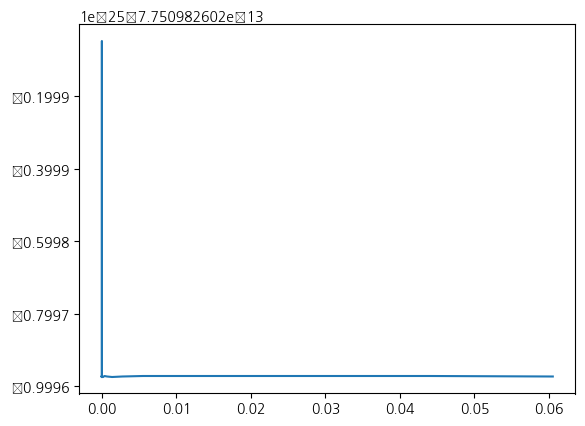

In [57]:
# plot the CH4 along the flow direction
plt.plot(soln.x, soln.CH4_dep)